In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('H2HBABBA1533.csv')

In [4]:
#check if  dupilcates are present in data
data.duplicated().sum()

1212

In [5]:
#deleteing dupicates
data.drop_duplicates(keep =False,inplace  = True)

In [6]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200895843,US,2019-09-09 00:00:00,2019.0,1.929776e+09,2019-08-22,20190822,20190822,20190906.0,USD,RV,1.0,NaN,41386.61,20190822.0,NAA8,1.929776e+09,0
1,U001,0200769623,WAL-MAR,2019-11-25 00:00:00,2019.0,1.930144e+09,2019-11-12,20191112,20191112,20191127.0,USD,RV,1.0,NaN,47178.82,20191112.0,NAH4,1.930144e+09,0
2,U001,0200769623,WAL-MAR foundation,2019-04-23 00:00:00,2019.0,1.929131e+09,2019-04-12,20190411,20190412,20190427.0,USD,RV,1.0,NaN,51389.52,20190412.0,NAH4,1.929131e+09,0
3,U001,0200769623,WAL-MAR co,2019-11-26 00:00:00,2019.0,1.930124e+09,2019-11-15,20191107,20191115,20191130.0,USD,RV,1.0,NaN,18177.18,20191115.0,NAH4,1.930124e+09,0
4,U001,0200769623,WAL-MAR,NaN,2020.0,1.930737e+09,2020-04-03,20200403,20200403,20200418.0,USD,RV,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1


In [7]:
#check for any constant features are present or not
data.columns[data.nunique()<=1]

Index(['posting_id', 'area_business'], dtype='object')

In [8]:
#delete the constant features
data.drop(columns=['posting_id', 'area_business'],inplace=True)

In [9]:
# a new list in created discarding the object datatype 
temp_data = data.drop(labels=['cust_number','business_code','name_customer','clear_date','posting_date','invoice_currency','document type','cust_payment_terms'], axis=1)
temp_data.dtypes

buisness_year             float64
doc_id                    float64
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
total_open_amount         float64
baseline_create_date      float64
invoice_id                float64
isOpen                      int64
dtype: object

In [10]:
temp_data.head()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,invoice_id,isOpen
0,2019.0,1.929776e+09,20190822,20190822,20190906.0,41386.61,20190822.0,1.929776e+09,0
1,2019.0,1.930144e+09,20191112,20191112,20191127.0,47178.82,20191112.0,1.930144e+09,0
2,2019.0,1.929131e+09,20190411,20190412,20190427.0,51389.52,20190412.0,1.929131e+09,0
3,2019.0,1.930124e+09,20191107,20191115,20191130.0,18177.18,20191115.0,1.930124e+09,0
4,2020.0,1.930737e+09,20200403,20200403,20200418.0,24079.57,20200403.0,1.930737e+09,1


In [11]:
#checking for quasi-constant 
s = VarianceThreshold(
    threshold=0.01)

s.fit(temp_data)
sum(s.get_support())

9

In [12]:
#  print the quasi-constant features if Any 
print(
    len([
        x for x in temp_data.columns
        if x not in temp_data.columns[s.get_support()]
    ]))

[x for x in temp_data.columns if x not in temp_data.columns[s.get_support()]]

0


[]

In [13]:
# checkin for majority of data
data["document type"].value_counts()

RV    47598
X2        4
Name: document type, dtype: int64

In [14]:
#since we are getting rv as 0.999 so it is of no use so we can delete it
data.drop('document type',axis = 1,inplace = True)

In [15]:
data[data['invoice_currency'] == 'CAD'].head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
25,CA02,0140104409,LOB trust,NaN,2020.0,2.960617e+09,2020-02-29,20200229,20200229,20200314.0,CAD,150136.21,20200304.0,CA10,2.960617e+09,1
36,CA02,0140104429,COSTCO co,2019-07-02 00:00:00,2019.0,2.960553e+09,2019-06-05,20190605,20190605,20190624.0,CAD,15993.34,20190614.0,CA10,2.960553e+09,0
37,CA02,0140106408,WAL-M foundation,NaN,2020.0,2.960623e+09,2020-03-21,20200321,20200321,20200331.0,CAD,4878.02,20200321.0,CA10,2.960623e+09,1
43,CA02,0140104423,METRO llc,NaN,2020.0,2.960630e+09,2020-04-20,20200420,20200420,20200501.0,CAD,162295.09,20200421.0,CA10,2.960630e+09,1
60,CA02,0140104429,COSTCO systems,NaN,2020.0,2.960617e+09,2020-02-27,20200227,20200227,20200309.0,CAD,12383.81,20200228.0,CA10,2.960617e+09,1


In [16]:
#CAD in converted into USD and all the values are stored in new column Total-open-Amount 
data['total_open_amount'] = np.where((data['invoice_currency'] == 'CAD') ,((data['total_open_amount'])*0.78),(data['total_open_amount']))

In [17]:
# All the CAD is converted to USD
data['invoice_currency'] = 'USD'
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200895843,US,2019-09-09 00:00:00,2019.0,1.929776e+09,2019-08-22,20190822,20190822,20190906.0,USD,41386.61,20190822.0,NAA8,1.929776e+09,0
1,U001,0200769623,WAL-MAR,2019-11-25 00:00:00,2019.0,1.930144e+09,2019-11-12,20191112,20191112,20191127.0,USD,47178.82,20191112.0,NAH4,1.930144e+09,0
2,U001,0200769623,WAL-MAR foundation,2019-04-23 00:00:00,2019.0,1.929131e+09,2019-04-12,20190411,20190412,20190427.0,USD,51389.52,20190412.0,NAH4,1.929131e+09,0
3,U001,0200769623,WAL-MAR co,2019-11-26 00:00:00,2019.0,1.930124e+09,2019-11-15,20191107,20191115,20191130.0,USD,18177.18,20191115.0,NAH4,1.930124e+09,0
4,U001,0200769623,WAL-MAR,NaN,2020.0,1.930737e+09,2020-04-03,20200403,20200403,20200418.0,USD,24079.57,20200403.0,NAH4,1.930737e+09,1


In [18]:
data['invoice_currency'].unique()

array(['USD'], dtype=object)

In [19]:
#since the invoice_currency becomes a constant so it is of no use thus dropped
data.drop(columns=['invoice_currency'],inplace=True)


<AxesSubplot:>

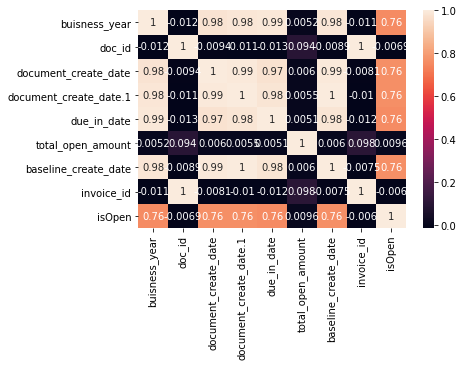

In [20]:
# corelation plot is done to eliminate some highly coorelated features
cor = data.corr()
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True)
 

In [21]:
# Since 'document_create_date','buisness_year','invoice_id','baseline_create_date' are corelated with others 
# so we can drop these features

data.drop(columns=['document_create_date','invoice_id','baseline_create_date'],inplace=True)

In [22]:
data.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date.1      int64
due_in_date               float64
total_open_amount         float64
cust_payment_terms         object
isOpen                      int64
dtype: object

In [23]:
# #since doc-id is a unique ids for the entitites we don't need it to train model so dropped
# data.drop(columns=['doc_id'],inplace=True)

In [24]:
#clear_date,posting_date,document_create_date.1,due_in_date are converted into datetime format for future operation
data['clear_date'] = pd.to_datetime(data['clear_date'])
data['posting_date'] = pd.to_datetime(data['posting_date']) 
data['document_create_date.1'] = pd.to_datetime(data['document_create_date.1'], format='%Y%m%d')
data['due_in_date'] = pd.to_datetime(data['due_in_date'], format='%Y%m%d')
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,isOpen
0,U001,0200895843,US,2019-09-09,2019.0,1.929776e+09,2019-08-22,2019-08-22,2019-09-06,41386.61,NAA8,0
1,U001,0200769623,WAL-MAR,2019-11-25,2019.0,1.930144e+09,2019-11-12,2019-11-12,2019-11-27,47178.82,NAH4,0
2,U001,0200769623,WAL-MAR foundation,2019-04-23,2019.0,1.929131e+09,2019-04-12,2019-04-12,2019-04-27,51389.52,NAH4,0
3,U001,0200769623,WAL-MAR co,2019-11-26,2019.0,1.930124e+09,2019-11-15,2019-11-15,2019-11-30,18177.18,NAH4,0
4,U001,0200769623,WAL-MAR,NaT,2020.0,1.930737e+09,2020-04-03,2020-04-03,2020-04-18,24079.57,NAH4,1


In [25]:
#sort the train data according to document_create_date.1 as we can't train model based on future data
data.sort_values(['posting_date'],inplace=True)
data.reset_index(inplace=True,drop=True)
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,isOpen
0,U001,0200739534,OK co,2019-01-14,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,90998.8000,NAA8,0
1,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,11025.2700,NAH4,0
2,CA02,0140105847,GORDON F in,2019-01-14,2019.0,2.960521e+09,2018-12-30,2018-12-30,2019-01-12,14088.2976,CA10,0
3,U001,0200769623,WAL-MAR systems,2019-01-14,2019.0,1.928535e+09,2018-12-30,2018-12-30,2019-01-14,21794.7000,NAH4,0
4,U001,0200769623,WAL-MAR co,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,65940.4700,NAH4,0


In [26]:
#splitting the the test and train data based on the clear_data features
#A new data set is created based on 
Train = data.loc[data['clear_date'].notnull()]
Train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,isOpen
0,U001,0200739534,OK co,2019-01-14,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,90998.8000,NAA8,0
1,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,11025.2700,NAH4,0
2,CA02,0140105847,GORDON F in,2019-01-14,2019.0,2.960521e+09,2018-12-30,2018-12-30,2019-01-12,14088.2976,CA10,0
3,U001,0200769623,WAL-MAR systems,2019-01-14,2019.0,1.928535e+09,2018-12-30,2018-12-30,2019-01-14,21794.7000,NAH4,0
4,U001,0200769623,WAL-MAR co,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,65940.4700,NAH4,0


In [27]:
#Where clear_date == null is putted into test dataframe
Test = data.loc[data.clear_date.isnull()]
Test.shape

(9414, 12)

In [28]:
#calculate the delay feature using clear_date-due_date
#DELAY is calculated by (clear_date-due_in_date)
Train['DELAY']=Train['clear_date'] - Train['due_in_date']
Train.head()

<ipython-input-28-10028587da12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['DELAY']=Train['clear_date'] - Train['due_in_date']


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,isOpen,DELAY
0,U001,0200739534,OK co,2019-01-14,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,90998.8000,NAA8,0,0 days
1,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,11025.2700,NAH4,0,-5 days
2,CA02,0140105847,GORDON F in,2019-01-14,2019.0,2.960521e+09,2018-12-30,2018-12-30,2019-01-12,14088.2976,CA10,0,2 days
3,U001,0200769623,WAL-MAR systems,2019-01-14,2019.0,1.928535e+09,2018-12-30,2018-12-30,2019-01-14,21794.7000,NAH4,0,0 days
4,U001,0200769623,WAL-MAR co,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,65940.4700,NAH4,0,1 days


# EDA PART


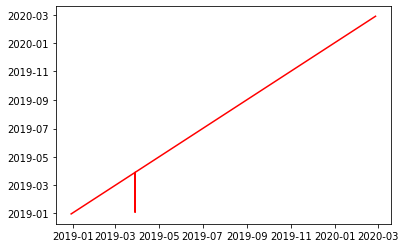

In [29]:
import matplotlib.pyplot as p
p.plot_date(Train['posting_date'], Train['document_create_date.1'],'r')
p.show()

From this Graph we are getting to know that Total-open-amount havs high no. of outliers present thus we need to handle it for better predictions of the model 

In [30]:
#since 'posting_date' ,'document_create_date.1'  features data are almost same so we can ignore either of feature
Train.drop(columns=['posting_date'],inplace=True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


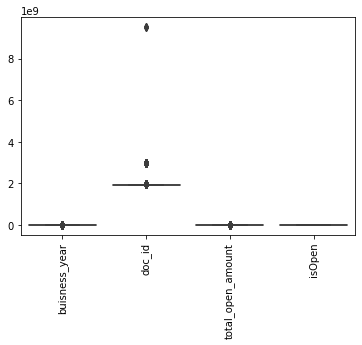

In [31]:
sns.boxplot(data=Train)
plt.xticks(rotation =90)
plt.show()

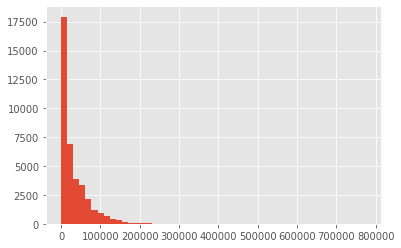

In [32]:
plt.style.use('ggplot')
plt.hist(Train['total_open_amount'],bins=50)
plt.show()

In [33]:
# checkin for Outliers in total_open_amount  present
from scipy.stats import zscore
z_scores = zscore(Train['total_open_amount'])
abs_z_scores = np.abs(z_scores)
out=pd.DataFrame(np.where(abs_z_scores<3,'Not Outlier','Outlier'))
out.value_counts()

Not Outlier    37522
Outlier          666
dtype: int64

from this inference we found that 666 no of outliers are present in total_open_amount we need to handle it 
through standarizations or normalizations before training 

# Feature Engineering


In [34]:


# month_quarter,month are calculated for further use in model prediction
Train['document_create_date.1_month-in-quarter'] = Train['document_create_date.1'].dt.quarter
Train['document_create_date.-in-_month'] = Train['document_create_date.1'].dt.month
Train['due_in_date-in-month'] = Train['due_in_date'].dt.month
Train['due_in_date-in-days'] =Train['due_in_date'].dt.day
Train['due_in_date-in-days'] =Train['due_in_date'].dt.quarter





Train.head()

<ipython-input-34-a19fcca5893c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['document_create_date.1_month-in-quarter'] = Train['document_create_date.1'].dt.quarter
<ipython-input-34-a19fcca5893c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['document_create_date.-in-_month'] = Train['document_create_date.1'].dt.month
<ipython-input-34-a19fcca5893c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,isOpen,DELAY,document_create_date.1_month-in-quarter,document_create_date.-in-_month,due_in_date-in-month,due_in_date-in-days
0,U001,0200739534,OK co,2019-01-14,2019.0,1.928541e+09,2018-12-30,2019-01-14,90998.8000,NAA8,0,0 days,4,12,1,1
1,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928540e+09,2018-12-30,2019-01-14,11025.2700,NAH4,0,-5 days,4,12,1,1
2,CA02,0140105847,GORDON F in,2019-01-14,2019.0,2.960521e+09,2018-12-30,2019-01-12,14088.2976,CA10,0,2 days,4,12,1,1
3,U001,0200769623,WAL-MAR systems,2019-01-14,2019.0,1.928535e+09,2018-12-30,2019-01-14,21794.7000,NAH4,0,0 days,4,12,1,1
4,U001,0200769623,WAL-MAR co,2019-01-15,2019.0,1.928542e+09,2018-12-30,2019-01-14,65940.4700,NAH4,0,1 days,4,12,1,1


In [35]:
# since we can't pass date datatype to a model so we have segregated it  and dropped the column document_create_date.1
Train.drop(columns=['document_create_date.1'],inplace=True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
#Since we have deriver the delay from claer date and due date so we can drop the those features
Train.drop(columns=['clear_date','due_in_date'],inplace=True)
Train['DELAY'] =  Train['DELAY'].dt.days
Train.head()

<ipython-input-36-ea9222097a22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['DELAY'] =  Train['DELAY'].dt.days


,business_code,cust_number,name_customer,buisness_year,doc_id,total_open_amount,cust_payment_terms,isOpen,DELAY,document_create_date.1_month-in-quarter,document_create_date.-in-_month,due_in_date-in-month,due_in_date-in-days
0,U001,0200739534,OK co,2019.0,1.928541e+09,90998.8000,NAA8,0,0,4,12,1,1
1,U001,0200769623,WAL-MAR associates,2019.0,1.928540e+09,11025.2700,NAH4,0,-5,4,12,1,1
2,CA02,0140105847,GORDON F in,2019.0,2.960521e+09,14088.2976,CA10,0,2,4,12,1,1
3,U001,0200769623,WAL-MAR systems,2019.0,1.928535e+09,21794.7000,NAH4,0,0,4,12,1,1
4,U001,0200769623,WAL-MAR co,2019.0,1.928542e+09,65940.4700,NAH4,0,1,4,12,1,1


In [37]:
Train.columns[Train.nunique()<=1]

Index(['isOpen'], dtype='object')

In [38]:
#Since the isopen is constant so we dropped it 
Train.drop(['isOpen'],axis=1,inplace= True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
# we don't need the cust_name  as cust id and cust_name are same and unique for training so dropped
Train.drop(columns=['name_customer'],inplace=True)

In [40]:
Train.dtypes

business_code                               object
cust_number                                 object
buisness_year                              float64
doc_id                                     float64
total_open_amount                          float64
cust_payment_terms                          object
DELAY                                        int64
document_create_date.1_month-in-quarter      int64
document_create_date.-in-_month              int64
due_in_date-in-month                         int64
due_in_date-in-days                          int64
dtype: object

### Splitting the Train data set into Train,Test,Validate set

In [41]:
#train dat is splitted in 8:2 format 
from sklearn.model_selection import train_test_split
Train_Final, validat = train_test_split(Train,test_size=.2,shuffle=False)
Train_Final.shape,validat.shape

((30550, 11), (7638, 11))

In [42]:
#20% validation data is splited 50% slab (in the sorted document_create_date.1)
validat_final,Test_Final = train_test_split(validat,test_size=.5,shuffle=False)
validat_final.shape,Test_Final.shape

((3819, 11), (3819, 11))

In [43]:
Train_Final.head()

,business_code,cust_number,buisness_year,doc_id,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month-in-quarter,document_create_date.-in-_month,due_in_date-in-month,due_in_date-in-days
0,U001,0200739534,2019.0,1.928541e+09,90998.8000,NAA8,0,4,12,1,1
1,U001,0200769623,2019.0,1.928540e+09,11025.2700,NAH4,-5,4,12,1,1
2,CA02,0140105847,2019.0,2.960521e+09,14088.2976,CA10,2,4,12,1,1
3,U001,0200769623,2019.0,1.928535e+09,21794.7000,NAH4,0,4,12,1,1
4,U001,0200769623,2019.0,1.928542e+09,65940.4700,NAH4,1,4,12,1,1


In [44]:
#since some features are catagorical  we have done label-encoding so that we can pass to model 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Train_Final.iloc[:,0] = labelencoder.fit_transform(Train_Final.iloc[:,0])
Train_Final.iloc[:,1] = labelencoder.fit_transform(Train_Final.iloc[:,1])
Train_Final.iloc[:,3] = labelencoder.fit_transform(Train_Final.iloc[:,3])
Train_Final.iloc[:,5] = labelencoder.fit_transform(Train_Final.iloc[:,5])

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [45]:
Train_Final.head()

,business_code,cust_number,buisness_year,doc_id,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month-in-quarter,document_create_date.-in-_month,due_in_date-in-month,due_in_date-in-days
0,1,715,2019.0,83,90998.8000,21,0,4,12,1,1
1,1,782,2019.0,65,11025.2700,33,-5,4,12,1,1
2,0,373,2019.0,28193,14088.2976,6,2,4,12,1,1
3,1,782,2019.0,35,21794.7000,33,0,4,12,1,1
4,1,782,2019.0,89,65940.4700,33,1,4,12,1,1


In [46]:
#since some features are catagorical  we have done label-encoding so that we can pass to model 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
validat_final.iloc[:,0] = labelencoder.fit_transform(validat_final.iloc[:,0])
validat_final.iloc[:,1] = labelencoder.fit_transform(validat_final.iloc[:,1])
validat_final.iloc[:,3] = labelencoder.fit_transform(validat_final.iloc[:,3])
validat_final.iloc[:,5] = labelencoder.fit_transform(validat_final.iloc[:,5])

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [47]:
validat_final.head()

,business_code,cust_number,buisness_year,doc_id,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month-in-quarter,document_create_date.-in-_month,due_in_date-in-month,due_in_date-in-days
30550,1,304,2019.0,53,17951.54,21,-2,4,11,12,4
30551,1,304,2019.0,16,54352.19,21,-5,4,11,12,4
30552,1,307,2019.0,97,3013.65,26,1,4,11,12,4
30553,1,304,2019.0,82,1695.68,21,-2,4,11,12,4
30554,1,304,2019.0,93,17427.08,21,-4,4,11,12,4


In [48]:
Test_Final.head()

,business_code,cust_number,buisness_year,doc_id,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month-in-quarter,document_create_date.-in-_month,due_in_date-in-month,due_in_date-in-days
34369,U001,0200769623,2020.0,1.930395e+09,55671.23,NAH4,-1,1,1,1,1
34370,U001,0200776463,2020.0,1.930390e+09,125277.01,NAA8,0,1,1,1,1
34371,U001,0200726979,2020.0,1.930390e+09,269.58,NAA8,0,1,1,1,1
34372,U001,0200769623,2020.0,1.930385e+09,2373.96,NAH4,-4,1,1,1,1
34373,U001,0200769623,2020.0,1.930386e+09,344.76,NAH4,-5,1,1,1,1


In [49]:
#since some features are catagorical  we have done label-encoding so that we can pass to model 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Test_Final.iloc[:,0] = labelencoder.fit_transform(Test_Final.iloc[:,0])
Test_Final.iloc[:,1] = labelencoder.fit_transform(Test_Final.iloc[:,1])
Test_Final.iloc[:,5] = labelencoder.fit_transform(Test_Final.iloc[:,5])
Test_Final.iloc[:,3] = labelencoder.fit_transform(Test_Final.iloc[:,3])

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [50]:
Test_Final.head()

,business_code,cust_number,buisness_year,doc_id,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month-in-quarter,document_create_date.-in-_month,due_in_date-in-month,due_in_date-in-days
34369,1,333,2020.0,124,55671.23,24,-1,1,1,1,1
34370,1,343,2020.0,51,125277.01,11,0,1,1,1,1
34371,1,273,2020.0,54,269.58,11,0,1,1,1,1
34372,1,333,2020.0,26,2373.96,24,-4,1,1,1,1
34373,1,333,2020.0,31,344.76,24,-5,1,1,1,1


In [51]:
Train_Final.dtypes

business_code                                int32
cust_number                                  int32
buisness_year                              float64
doc_id                                       int64
total_open_amount                          float64
cust_payment_terms                           int32
DELAY                                        int64
document_create_date.1_month-in-quarter      int64
document_create_date.-in-_month              int64
due_in_date-in-month                         int64
due_in_date-in-days                          int64
dtype: object

In [52]:
Test_Final.dtypes

business_code                                int32
cust_number                                  int32
buisness_year                              float64
doc_id                                       int64
total_open_amount                          float64
cust_payment_terms                           int32
DELAY                                        int64
document_create_date.1_month-in-quarter      int64
document_create_date.-in-_month              int64
due_in_date-in-month                         int64
due_in_date-in-days                          int64
dtype: object

In [53]:
validat_final.dtypes

business_code                                int32
cust_number                                  int32
buisness_year                              float64
doc_id                                       int64
total_open_amount                          float64
cust_payment_terms                           int32
DELAY                                        int64
document_create_date.1_month-in-quarter      int64
document_create_date.-in-_month              int64
due_in_date-in-month                         int64
due_in_date-in-days                          int64
dtype: object

# Features Selection

In [54]:
#Extracting best features to be fed to train our model
from sklearn.ensemble import ExtraTreesClassifier
x=Train_Final.drop(labels=['DELAY'], axis=1)
y= Train_Final['DELAY']
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

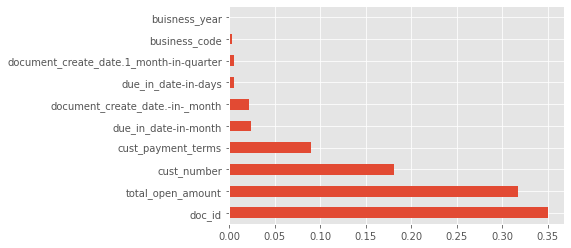

In [55]:
selt = pd.Series(model.feature_importances_, index=x.columns)
selt.nlargest(11).plot(kind='barh')
plt.show()

In [57]:
Train_Final.drop(columns=['due_in_date-in-days','document_create_date.1_month-in-quarter','business_code','buisness_year'],inplace=True)
Test_Final.drop(columns=['due_in_date-in-days','document_create_date.1_month-in-quarter','business_code','buisness_year'],inplace=True)
validat_final.drop(columns=['due_in_date-in-days','document_create_date.1_month-in-quarter','business_code','buisness_year'],inplace=True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [58]:
Train_Final.dtypes

cust_number                          int32
doc_id                               int64
total_open_amount                  float64
cust_payment_terms                   int32
DELAY                                int64
document_create_date.-in-_month      int64
due_in_date-in-month                 int64
dtype: object

In [59]:
#spliting train_final
X_train = Train_Final.drop(labels=['DELAY'], axis=1)
y_train = Train_Final['DELAY']
X_train.shape,y_train.shape

((30550, 6), (30550,))

In [60]:
#spliting validation_final
X_val = validat_final.drop(labels=['DELAY'], axis=1)
y_val = validat_final['DELAY']
X_val.shape,y_val.shape

((3819, 6), (3819,))

In [61]:
#spliting test_final
X_test = Test_Final.drop(labels=['DELAY'], axis=1)
y_test = Test_Final['DELAY']
X_test.shape,y_test.shape

((3819, 6), (3819,))

In [62]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_val)

In [63]:
y_train

0        0
1       -5
2        2
3        0
4        1
        ..
30545   -2
30546    1
30547   -5
30548    2
30549   -4
Name: DELAY, Length: 30550, dtype: int64

In [64]:
X_train

,cust_number,doc_id,total_open_amount,cust_payment_terms,document_create_date.-in-_month,due_in_date-in-month
0,715,83,90998.8000,21,12,1
1,782,65,11025.2700,33,12,1
2,373,28193,14088.2976,6,12,1
3,782,35,21794.7000,33,12,1
4,782,89,65940.4700,33,12,1
...,...,...,...,...,...,...
30545,782,27658,1259.3400,33,11,12
30546,685,27619,737.2600,21,11,12
30547,782,27641,18103.7300,33,11,12
30548,729,27633,35551.6600,21,11,12


In [65]:
y_train

0        0
1       -5
2        2
3        0
4        1
        ..
30545   -2
30546    1
30547   -5
30548    2
30549   -4
Name: DELAY, Length: 30550, dtype: int64

In [66]:
# checking model in train_final
model_2 = SVR()
model_2.fit(X_train_scaled,y_train)
pred_value = model_2.predict(X_test_scaled)
print(f'score = {model_2.score(X_test_scaled,y_test)}')
print(f'r2_score = {r2_score(y_test,pred_value)}')
print(f'mean_squared_error = {mean_squared_error(y_test, pred_value,squared =False)}')
root_mean_square_error=sqrt(mean_squared_error(y_test, pred_value))
print(f'root_mean_square_error = {root_mean_square_error}')

score = -0.10914571294142683
r2_score = -0.10914571294142683
mean_squared_error = 10.429909994441527
root_mean_square_error = 10.429909994441527


In [495]:
pred_value

array([1.01467495, 0.51834948, 0.94730099, ..., 3.16359949, 2.3251826 ,
       1.87735283])

In [496]:
y_test

34369   -1
34370    0
34371    0
34372   -4
34373   -5
        ..
38204    7
38225    4
38247   -1
38293   -1
38307    0
Name: DELAY, Length: 3819, dtype: int64

In [67]:
deta = pd.DataFrame(zip(y_test,pred_value))
deta

,0,1
0,-1,2.257752
1,0,1.216339
2,0,1.725982
3,-4,2.317503
4,-5,2.140428
...,...,...
3814,7,4.670226
3815,4,1.528416
3816,-1,5.050969
3817,-1,4.131187


In [68]:
# checking model in train_final
model_3 = DecisionTreeRegressor(max_depth =2)
model_3.fit(X_train_scaled,y_train)
pred_value = model_3.predict(X_val)
print(f'score = {model_3.score(X_test_scaled,y_test)}')
print(f'r2_score = {r2_score(y_test,pred_value)}')
print(f'mean_squared_error = {mean_squared_error(y_test, pred_value,squared=False)}')
root_mean_square_error=sqrt(mean_squared_error(y_test, pred_value))
print(f'root_mean_square_error = {root_mean_square_error}')

score = -0.04023199797829813
r2_score = -19.183300059561137
mean_squared_error = 44.49204282892475
root_mean_square_error = 44.49204282892475


In [485]:
pred_value

array([45.21132898, 45.21132898, 45.21132898, ..., 45.21132898,
       45.21132898, 45.21132898])

In [241]:
deta = pd.DataFrame(zip(y_train,pred_value))
deta

,0,1
0,0,43.211321
1,-5,43.211321
2,2,43.211321
3,0,43.211321
4,1,43.211321
...,...,...
3814,-1,43.211321
3815,-10,43.211321
3816,-5,43.211321
3817,2,43.211321


In [488]:
from xgboost import XGBClassifier
model_4 = XGBClassifier(max_depth =20)
model_4.fit(X_train_scaled,y_train)
pred_value = model_4.predict(X_val)
print(f'score = {model_4.score(X_test_scaled,y_test)}')
print(f'r2_score = {r2_score(y_test,pred_value)}')
print(f'mean_squared_error = {mean_squared_error(y_test, pred_value,squared=False)}')
root_mean_square_error=sqrt(mean_squared_error(y_test, pred_value))
print(f'root_mean_square_error = {root_mean_square_error}')

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:45:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score = 0.08064938465566902
r2_score = -0.08648085903071201
mean_squared_error = 10.322794886343258
root_mean_square_error = 10.322794886343258


In [487]:
pred_value

array([20, 20, 20, ..., -7, -7, -7], dtype=int64)

In [498]:
# checking model in train_final
model_4 = RandomForestRegressor()
model_4.fit(X_train_scaled,y_train)
pred_value = model_4.predict(X_test_scaled)
print(f'score = {model_4.score(X_test_scaled,y_test)}')
print(f'r2_score = {r2_score(y_test,pred_value)}')
print(f'mean_squared_error = {mean_squared_error(y_test, pred_value)}')
root_mean_square_error=sqrt(mean_squared_error(y_test, pred_value))
print(f'root_mean_square_error = {root_mean_square_error}')

score = -0.45009996324212476
r2_score = -0.45009996324212476
mean_squared_error = 142.22320392772977
root_mean_square_error = 11.925737039182517
